In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('quikr_car.csv')

In [60]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [62]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [70]:
df1 = df.copy()

In [72]:

df1['Price'] = df1['Price'].str.replace(',', '')

# 2. Convert to numeric, 'Ask For Price' will become NaN
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

In [74]:
# 1. Remove ' kms'
df1['kms_driven'] = df1['kms_driven'].str.replace(' kms', '')

# 2. Remove the comma
df1['kms_driven'] = df1['kms_driven'].str.replace(',', '')

# 3. Convert to numeric
df1['kms_driven'] = pd.to_numeric(df1['kms_driven'], errors='coerce')

df1['year'] = pd.to_numeric(df1['year'],errors = 'coerce')

In [79]:
df1.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        892 non-null    object 
 1   company     892 non-null    object 
 2   year        842 non-null    float64
 3   Price       857 non-null    float64
 4   kms_driven  838 non-null    float64
 5   fuel_type   837 non-null    object 
dtypes: float64(3), object(3)
memory usage: 41.9+ KB


In [77]:
df1.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,425000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,NaN,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,575000.0,36000.0,Diesel


In [78]:
# This removes rows from the DataFrame where 'Price' is NaN
df1 = df1.dropna(subset=['Price'])
df1 = df1.dropna(subset=['fuel_type'])

C:\Users\hempa\AppData\Local\Temp\ipykernel_3584\3104656361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['year'])


<Axes: xlabel='year', ylabel='Density'>

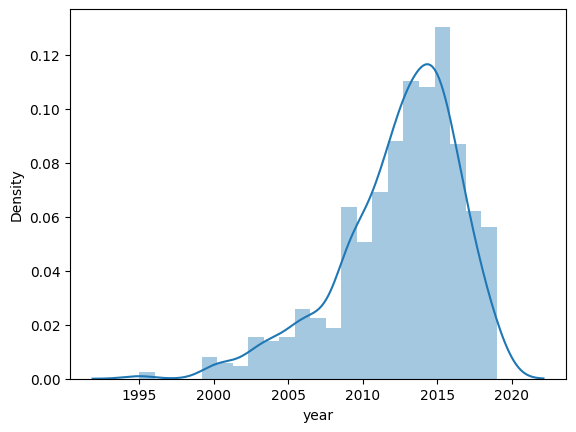

In [84]:
sns.distplot(df1['year'])

In [80]:
median_km = df1['kms_driven'].median()
median_year = df1['year'].median()
median_km
# median_year

np.float64(41000.0)

In [81]:
df1['kms_driven'] = df1['kms_driven'].fillna(median_km)
df1['year'] = df1['year'].fillna(median_year)

In [82]:
df1['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [83]:
df1['Price'] = df1['Price'].astype(int)
df1['year'] = df1['year'].astype(int)
df1['kms_driven'] = df1['kms_driven'].astype(int)

<Axes: ylabel='Price'>

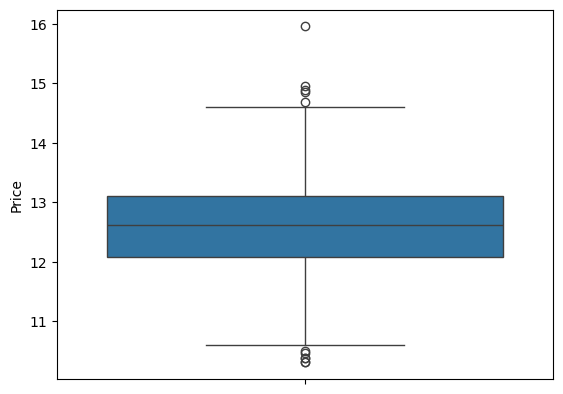

In [84]:
sns.boxplot(np.log1p(df1['Price']))

C:\Users\hempa\AppData\Local\Temp\ipykernel_31296\2930838305.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df1['car_age']))


<Axes: xlabel='car_age', ylabel='Density'>

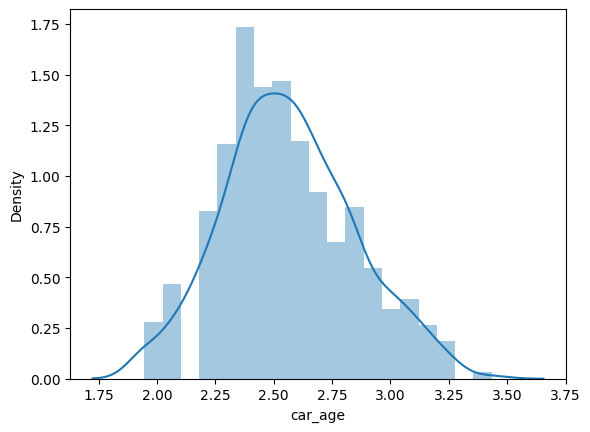

In [85]:
df1['car_age'] = 2025 - df1['year']
sns.distplot(np.log1p(df1['car_age']))

In [86]:
df1['Price'] = np.log1p(df1['Price'])
df1['kms_driven'] = np.log1p(df1['kms_driven'])
df1['car_age'] = np.log1p(df1['car_age'])

df1.drop('year',axis=1,inplace=True)

C:\Users\hempa\AppData\Local\Temp\ipykernel_31296\1677968706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['car_age'])


<Axes: xlabel='car_age', ylabel='Density'>

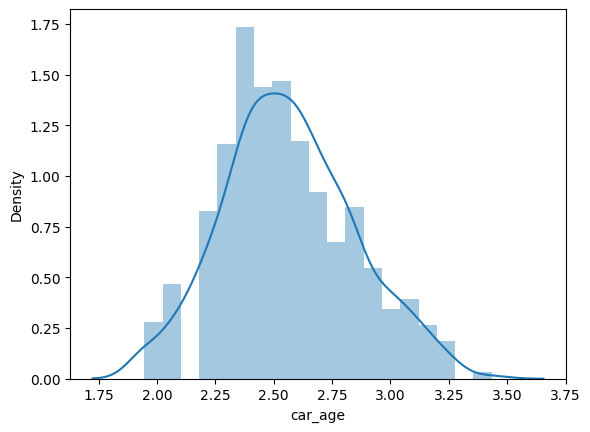

In [87]:
sns.distplot(df1['car_age'])

In [88]:
df1['model_name'] = df1['name'].str.split().str[:3].str.join(' ')
df1 = df1.drop(columns=['name'])

In [89]:
df1.head()

,company,Price,kms_driven,fuel_type,car_age,model_name
0,Hyundai,11.289794,10.714440,Petrol,2.944439,Hyundai Santro Xing
1,Mahindra,12.959847,3.713572,Diesel,2.995732,Mahindra Jeep CL550
3,Hyundai,12.691584,10.239996,Petrol,2.484907,Hyundai Grand i10
4,Ford,13.262127,10.491302,Diesel,2.484907,Ford EcoSport Titanium
6,Ford,12.072547,10.621352,Diesel,2.639057,Ford Figo


In [90]:
X = df1.drop(columns=['Price'])
y = df1['Price']

In [91]:
X

,company,kms_driven,fuel_type,car_age,model_name
0,Hyundai,10.714440,Petrol,2.944439,Hyundai Santro Xing
1,Mahindra,3.713572,Diesel,2.995732,Mahindra Jeep CL550
3,Hyundai,10.239996,Petrol,2.484907,Hyundai Grand i10
4,Ford,10.491302,Diesel,2.484907,Ford EcoSport Titanium
6,Ford,10.621352,Diesel,2.639057,Ford Figo
...,...,...,...,...,...
883,Maruti,10.819798,Petrol,2.708050,Maruti Suzuki Ritz
885,Tata,10.308986,Diesel,2.833213,Tata Indica V2
886,Toyota,11.790565,Petrol,2.833213,Toyota Corolla Altis
888,Tata,10.203629,Diesel,2.079442,Tata Zest XM


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.ensemble import RandomForestRegressor

# 1. Define which columns go where
categorical_features = ['company', 'fuel_type','model_name']
numeric_features = ['kms_driven', 'car_age']

numeric_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()) 
])

In [94]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [95]:
score = pipe.score(X_test, y_test)
print(score)

0.7387173217114154


In [96]:
from sklearn.model_selection import cross_val_score

# Use your main 'X' and 'y' data (before the train_test_split)
# Use your 'pipe' (the pipeline with the preprocessor and model)
# 'cv=5' means 5-fold cross-validation
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(f"R2 scores for each fold: {scores}")
print(f"Average R2 score: {scores.mean()}")

R2 scores for each fold: [0.52177692 0.81355439 0.7474557  0.72775254 0.73771616]
Average R2 score: 0.7096511411253056


In [97]:
import pickle 

pickle.dump(pipe, open('model.pkl', 'wb'))

In [98]:
import json
unique_values = {
    'companies': df1['company'].unique().tolist(),
    'models': df1['model_name'].unique().tolist(),
    'fuel_types': df1['fuel_type'].unique().tolist()
}
with open('options.json', 'w') as f:
    json.dump(unique_values, f)